In [1]:
import torch
from torch import nn

import torchvision
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import matplotlib_inline

from pathlib import Path


In [2]:
device = "cuda"
device

'cuda'

In [3]:
data_path = Path(r'C:\\Users\\johnd\\Documents\\School\\Graduate School\\Computer Science\\VSCode\\countryshape\\mapsicon-master\\all\\')

In [4]:
import os

# for dirpath, dirnames, filenames in os.walk(data_path):
#     print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")



In [5]:
train_dir = data_path / "train"
test_dir = data_path / "test"

train_dir, test_dir

(WindowsPath('C:/Users/johnd/Documents/School/Graduate School/Computer Science/VSCode/countryshape/mapsicon-master/all/train'),
 WindowsPath('C:/Users/johnd/Documents/School/Graduate School/Computer Science/VSCode/countryshape/mapsicon-master/all/test'))

Random image path: C:\Users\johnd\Documents\School\Graduate School\Computer Science\VSCode\countryshape\mapsicon-master\all\test\tonga\48.png
Image class: tonga
Image height: 48
Image width: 48


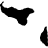

In [6]:
import random
from PIL import Image

random.seed(52)
image_path_list = list(data_path.glob("*/*/*.png"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

In [7]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [8]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(128, 128)),
    # Flip the images randomly on the horizontal
    # transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

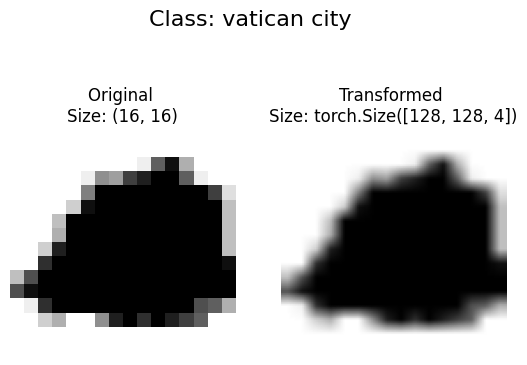

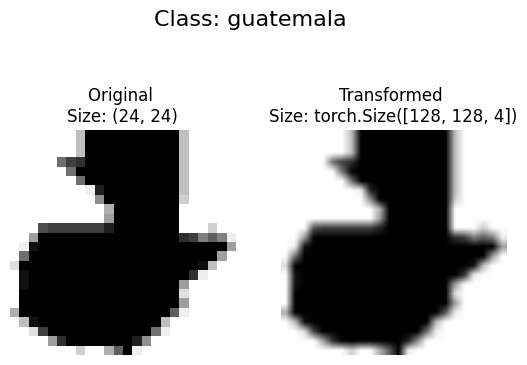

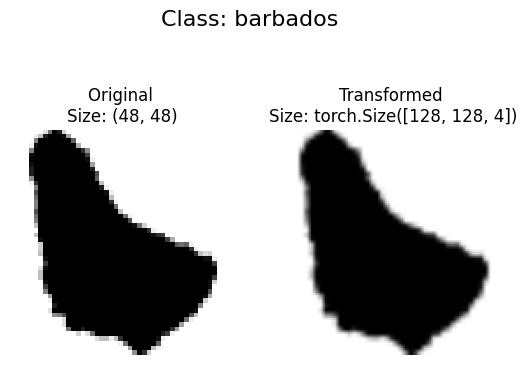

In [9]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

In [10]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 1454
    Root location: C:\Users\johnd\Documents\School\Graduate School\Computer Science\VSCode\countryshape\mapsicon-master\all\train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 1212
    Root location: C:\Users\johnd\Documents\School\Graduate School\Computer Science\VSCode\countryshape\mapsicon-master\all\test
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [11]:
class_names = train_data.classes

In [12]:
class_dict = train_data.class_to_idx

In [13]:
len(train_data), len(test_data)

(1454, 1212)

In [14]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])
Image shape: torch.Size([3, 128, 128])
Image datatype: torch.float32
Image label: 0
Label datatype: <class 'int'>


Original shape: torch.Size([3, 128, 128]) -> [color_channels, height, width]
Image permute shape: torch.Size([128, 128, 3]) -> [height, width, color_channels]


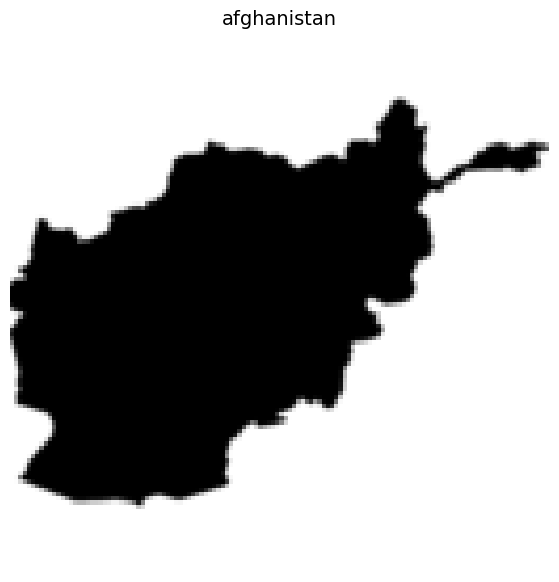

In [15]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [16]:
os.cpu_count()

20

In [17]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset = train_data,
                              batch_size= 1,
                              num_workers= 1,
                              shuffle = True)

test_dataloader = DataLoader(dataset= test_data,
                             batch_size= 1, 
                             num_workers= 1, 
                             shuffle = True)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1ee8e95be20>,
 <torch.utils.data.dataloader.DataLoader at 0x1ee91db81c0>)

In [18]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 128, 128]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [19]:
import pathlib

from typing import Tuple, Dict, List

target_directory = train_dir
print(f"Target directory: {target_directory}")

class_names_found = sorted([entry.name for entry in list(os.scandir(data_path / "train"))])
print(f"class names found: {class_names_found}")

Target directory: C:\Users\johnd\Documents\School\Graduate School\Computer Science\VSCode\countryshape\mapsicon-master\all\train
class names found: ['afghanistan', 'aland islands', 'albania', 'algeria', 'american samoa', 'andorra', 'angola', 'anguilla', 'antartica', 'antigua and barbuda', 'argentina', 'armenia', 'aruba', 'australia', 'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bailiwick of guernsey', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bermuda', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'bouvet island', 'brazil', 'british indian ocean territory', 'british virgin islands', 'brunei', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'canada', 'caribbean netherlands', 'cayman islands', 'central african republic', 'chad', 'chile', 'china', 'christmas island', 'cocos islands', 'columbia', 'comoros', 'cook islands', 'costa rica', "cote d'ivoire", 'croatia', 'cuba', 'curacao', 'cyprus', 'czechia', 'democratic repu

In [20]:
def find_classes(directory: str) ->Tuple[List[str], Dict[str, int]]:
    """FInds the class folder names in a target directory.

    Assumes target directory is in standard image classification format

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: inx...))
    
    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2", {"class_1": 0, ...}])
    """

    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    if not classes:
        raise FileNotFoundError(f"Coun;dn't find and classes in {directory}.")
    
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [21]:
find_classes(train_dir)

(['afghanistan',
  'aland islands',
  'albania',
  'algeria',
  'american samoa',
  'andorra',
  'angola',
  'anguilla',
  'antartica',
  'antigua and barbuda',
  'argentina',
  'armenia',
  'aruba',
  'australia',
  'austria',
  'azerbaijan',
  'bahamas',
  'bahrain',
  'bailiwick of guernsey',
  'bangladesh',
  'barbados',
  'belarus',
  'belgium',
  'belize',
  'benin',
  'bermuda',
  'bhutan',
  'bolivia',
  'bosnia and herzegovina',
  'botswana',
  'bouvet island',
  'brazil',
  'british indian ocean territory',
  'british virgin islands',
  'brunei',
  'bulgaria',
  'burkina faso',
  'burundi',
  'cabo verde',
  'cambodia',
  'cameroon',
  'canada',
  'caribbean netherlands',
  'cayman islands',
  'central african republic',
  'chad',
  'chile',
  'china',
  'christmas island',
  'cocos islands',
  'columbia',
  'comoros',
  'cook islands',
  'costa rica',
  "cote d'ivoire",
  'croatia',
  'cuba',
  'curacao',
  'cyprus',
  'czechia',
  'democratic republic of the congo',
  'denm

In [22]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    
    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:
        
        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.png")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path) 
    
    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    
    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [23]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((128,128)),
    # transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor() 
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

In [24]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, 
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, 
                                     transform=test_transforms)

# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)


In [25]:
len(train_data_custom), len(test_data_custom)

(1454, 1212)

In [26]:
train_data_custom.classes

['afghanistan',
 'aland islands',
 'albania',
 'algeria',
 'american samoa',
 'andorra',
 'angola',
 'anguilla',
 'antartica',
 'antigua and barbuda',
 'argentina',
 'armenia',
 'aruba',
 'australia',
 'austria',
 'azerbaijan',
 'bahamas',
 'bahrain',
 'bailiwick of guernsey',
 'bangladesh',
 'barbados',
 'belarus',
 'belgium',
 'belize',
 'benin',
 'bermuda',
 'bhutan',
 'bolivia',
 'bosnia and herzegovina',
 'botswana',
 'bouvet island',
 'brazil',
 'british indian ocean territory',
 'british virgin islands',
 'brunei',
 'bulgaria',
 'burkina faso',
 'burundi',
 'cabo verde',
 'cambodia',
 'cameroon',
 'canada',
 'caribbean netherlands',
 'cayman islands',
 'central african republic',
 'chad',
 'chile',
 'china',
 'christmas island',
 'cocos islands',
 'columbia',
 'comoros',
 'cook islands',
 'costa rica',
 "cote d'ivoire",
 'croatia',
 'cuba',
 'curacao',
 'cyprus',
 'czechia',
 'democratic republic of the congo',
 'denmark',
 'djibouti',
 'dominica',
 'dominican republic',
 'ecuad

In [27]:
train_data_custom.class_to_idx

{'afghanistan': 0,
 'aland islands': 1,
 'albania': 2,
 'algeria': 3,
 'american samoa': 4,
 'andorra': 5,
 'angola': 6,
 'anguilla': 7,
 'antartica': 8,
 'antigua and barbuda': 9,
 'argentina': 10,
 'armenia': 11,
 'aruba': 12,
 'australia': 13,
 'austria': 14,
 'azerbaijan': 15,
 'bahamas': 16,
 'bahrain': 17,
 'bailiwick of guernsey': 18,
 'bangladesh': 19,
 'barbados': 20,
 'belarus': 21,
 'belgium': 22,
 'belize': 23,
 'benin': 24,
 'bermuda': 25,
 'bhutan': 26,
 'bolivia': 27,
 'bosnia and herzegovina': 28,
 'botswana': 29,
 'bouvet island': 30,
 'brazil': 31,
 'british indian ocean territory': 32,
 'british virgin islands': 33,
 'brunei': 34,
 'bulgaria': 35,
 'burkina faso': 36,
 'burundi': 37,
 'cabo verde': 38,
 'cambodia': 39,
 'cameroon': 40,
 'canada': 41,
 'caribbean netherlands': 42,
 'cayman islands': 43,
 'central african republic': 44,
 'chad': 45,
 'chile': 46,
 'china': 47,
 'christmas island': 48,
 'cocos islands': 49,
 'columbia': 50,
 'comoros': 51,
 'cook island

In [28]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


In [29]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

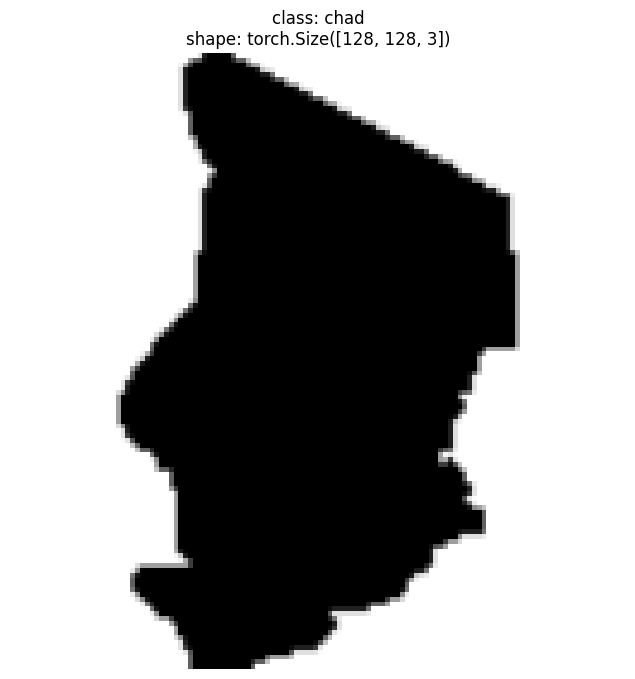

In [30]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data, 
                      n=1, 
                      classes=class_names,
                      seed=1)

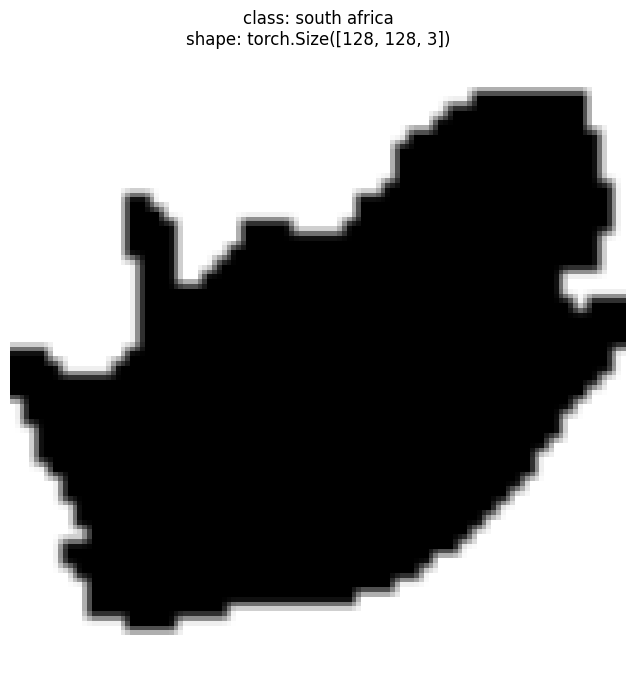

In [31]:
# Display random images from ImageFolder created Dataset
display_random_images(test_data, 
                      n=1, 
                      classes=class_names,
                      seed=122277)

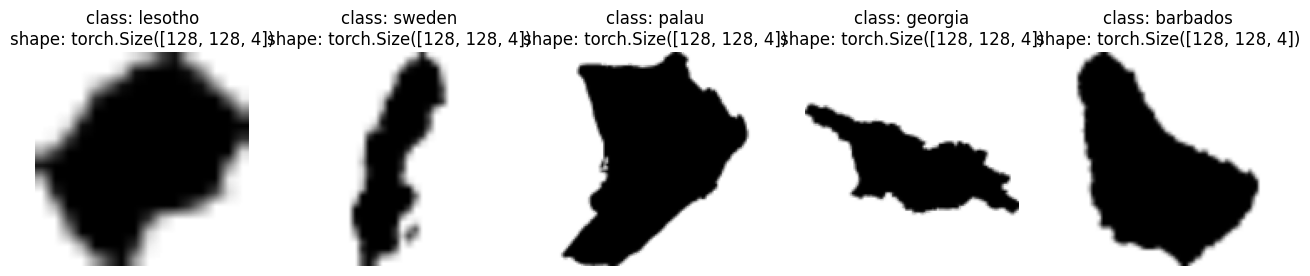

In [32]:
# Display random images from ImageFolderCustom Dataset
display_random_images(train_data_custom, 
                      n=5, 
                      classes=class_names,
                      seed=None) # Try setting the seed for reproducible images

In [33]:
from torchvision import transforms

# train_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense 
#     transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
# ])

# # Don't need to perform augmentation on the test data
# test_transforms = transforms.Compose([
#     transforms.Resize((224, 224)), 
#     transforms.ToTensor()
# ])

In [34]:
# # Get all image paths
# image_path_list = list(data_path.glob("*/*/*.png"))

# # Plot random images
# plot_transformed_images(
#     image_paths=image_path_list,
#     transform=train_transforms,
#     n=3,
#     seed=None
# )

In [35]:
# Create simple transform
simple_transform = transforms.Compose([ 
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

In [36]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers 
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple, 
                                     batch_size=BATCH_SIZE, 
                                     shuffle=True, 
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

#####################

train_dataloader_augmented = DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

Creating DataLoader's with batch size 32 and 20 workers.


(<torch.utils.data.dataloader.DataLoader at 0x1ee8e95afe0>,
 <torch.utils.data.dataloader.DataLoader at 0x1ee91db81c0>)

In [43]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        # self.conv_block_2 = nn.Sequential(
        #     nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        #     nn.ReLU(),
        #     nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        #     nn.ReLU(),
        #     nn.MaxPool2d(2)
        # )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        # x = self.conv_block_2(x)
        # # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=242, bias=True)
  )
)

In [44]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int, input_image_size: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=1), 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # self.conv_block_2 = nn.Sequential(
        #     nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        #     nn.ReLU(),
        #     nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
        #     nn.ReLU(),
        #     nn.MaxPool2d(2)
        # )
        
        # Calculate the output size after the convolutional blocks
        conv_output_size = input_image_size // (2 ** 2)  # Dividing by 2 for each MaxPool2d
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * conv_output_size * conv_output_size,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

# Example Usage
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, 
                  hidden_units=10, 
                  output_shape=len(train_data.classes), 
                  input_image_size=128).to(device)

# # Create model_1 and send it to the target device
# model_1 = TinyVGG(
#     input_shape=3,
#     hidden_units=10,
#     output_shape=len(train_data_augmented.classes),
#     input_image_size=128).to(device)
# model_1


In [52]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 128, 128])



RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x40960 and 10240x242)

In [45]:
# Install torchinfo if it's not available, import it if it is
try: 
    import torchinfo
except:
    # !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1, 3, 128,128]) # do a test pass through of an example input size 

RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: [Sequential: 1, Conv2d: 2, ReLU: 2, Conv2d: 2, ReLU: 2, MaxPool2d: 2, Flatten: 2]

In [46]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [47]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [48]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

c:\Users\johnd\Documents\School\Graduate School\Computer Science\VSCode\wordlesolver\vschoolp310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes),
                  input_image_size=128).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

# # Set random seeds
# torch.manual_seed(42) 
# torch.cuda.manual_seed(42)

# # Set number of epochs
# NUM_EPOCHS = 5

# # Setup loss function and optimizer
# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# # Start the timer
# from timeit import default_timer as timer 
# start_time = timer()

# # Train model_1
# model_1_results = train(model=model_0, 
#                         train_dataloader=train_dataloader_augmented,
#                         test_dataloader=test_dataloader_simple,
#                         optimizer=optimizer,
#                         loss_fn=loss_fn, 
#                         epochs=NUM_EPOCHS)

# # End the timer and print out how long it took
# end_time = timer()
# print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [01:04<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x40960 and 10240x242)

In [54]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

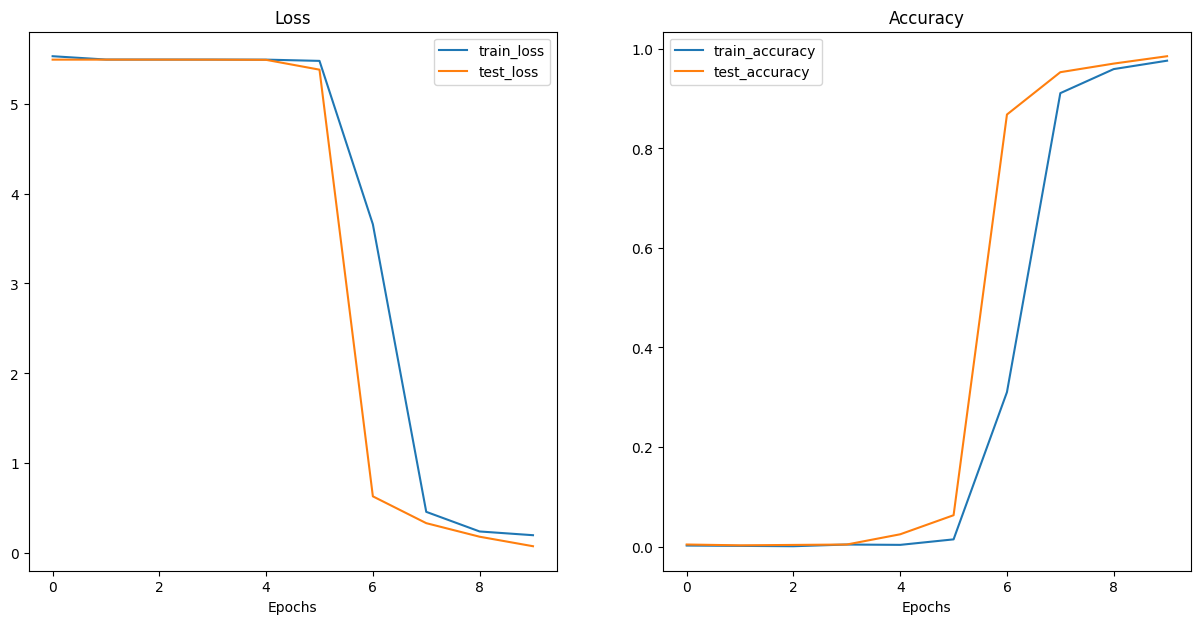

: 

: 

: 

In [143]:
plot_loss_curves(model_0_results)

In [69]:
import torchvision

game_images_path = Path(r'C:\\Users\\johnd\\Documents\\School\\Graduate School\\Computer Science\\VSCode\\countryshape\\screenshots\\')
todays = game_images_path / "worldle-2024-12-22.png"
# Read in custom image
custom_image = torchvision.io.read_image(todays)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255. 
custom_image3 = custom_image.repeat(3, 1, 1)

# Print out image data
print(f"Custom image tensor:\n{custom_image3}\n")
print(f"Custom image shape: {custom_image3.shape}\n")
print(f"Custom image dtype: {custom_image3.dtype}")

Custom image tensor:
tensor([[[0.9098, 0.9098, 0.9098,  ..., 0.9098, 0.9098, 0.9098],
         [0.9098, 0.9098, 0.9098,  ..., 0.9098, 0.9098, 0.9098],
         [0.9098, 0.9098, 0.9098,  ..., 0.9098, 0.9098, 0.9098],
         ...,
         [0.9098, 0.9098, 0.9098,  ..., 0.9098, 0.9098, 0.9098],
         [0.9098, 0.9098, 0.9098,  ..., 0.9098, 0.9098, 0.9098],
         [0.9098, 0.9098, 0.9098,  ..., 0.9098, 0.9098, 0.9098]],

        [[0.9098, 0.9098, 0.9098,  ..., 0.9098, 0.9098, 0.9098],
         [0.9098, 0.9098, 0.9098,  ..., 0.9098, 0.9098, 0.9098],
         [0.9098, 0.9098, 0.9098,  ..., 0.9098, 0.9098, 0.9098],
         ...,
         [0.9098, 0.9098, 0.9098,  ..., 0.9098, 0.9098, 0.9098],
         [0.9098, 0.9098, 0.9098,  ..., 0.9098, 0.9098, 0.9098],
         [0.9098, 0.9098, 0.9098,  ..., 0.9098, 0.9098, 0.9098]],

        [[0.9098, 0.9098, 0.9098,  ..., 0.9098, 0.9098, 0.9098],
         [0.9098, 0.9098, 0.9098,  ..., 0.9098, 0.9098, 0.9098],
         [0.9098, 0.9098, 0.9098,  ..

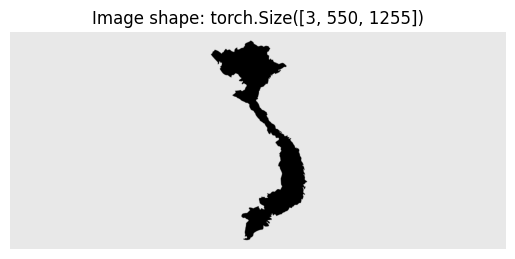

In [70]:
# Plot custom image
plt.imshow(custom_image3.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image3.shape}")
plt.axis(False);

In [71]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((128, 128)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image3)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([1, 550, 1255])
New shape: torch.Size([3, 128, 128])


In [72]:
model_0.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
    
    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")
    
    # Make a prediction on image with an extra dimension
    custom_image_pred = model_0(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 128, 128])
Unsqueezed custom image shape: torch.Size([1, 3, 128, 128])


In [73]:
custom_image_pred

tensor([[-41.4357, -40.3113, -40.3619, -48.0625, -31.2493, -48.9956, -39.3697,
         -32.6428, -43.4471, -34.8777, -38.5468, -41.7627, -40.0720, -46.6537,
         -44.2015, -42.9121, -27.1888, -34.4125, -42.0640, -39.4320, -38.5729,
         -49.3122, -40.6973, -40.1470, -35.6290, -28.8738, -50.6390, -48.5339,
         -43.0670, -42.0184, -53.4949, -52.5057, -27.6319, -27.1783, -34.9531,
         -45.7026, -42.6686, -44.6742, -27.9097, -47.1903, -40.6232, -37.8339,
         -35.0800, -32.6956, -43.7107, -48.8074, -28.6442, -46.1384, -41.1144,
         -28.1916, -37.7641, -28.7140, -50.8055, -44.1784, -43.9342, -30.6160,
         -29.4440, -30.6327, -34.9348, -43.7329, -41.8879, -33.4989, -45.0624,
         -44.1975, -42.0917, -48.2559, -45.2448, -43.1495, -54.1449, -36.6037,
         -41.0410, -41.2471, -31.2830, -27.8596, -29.3251, -34.5374, -45.0096,
         -47.5019, -27.5905, -34.9330, -49.1647, -28.2538, -39.6865, -47.1692,
         -46.7672, -39.4571, -32.0648, -42.8528, -46

In [74]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[-41.4357, -40.3113, -40.3619, -48.0625, -31.2493, -48.9956, -39.3697,
         -32.6428, -43.4471, -34.8777, -38.5468, -41.7627, -40.0720, -46.6537,
         -44.2015, -42.9121, -27.1888, -34.4125, -42.0640, -39.4320, -38.5729,
         -49.3122, -40.6973, -40.1470, -35.6290, -28.8738, -50.6390, -48.5339,
         -43.0670, -42.0184, -53.4949, -52.5057, -27.6319, -27.1783, -34.9531,
         -45.7026, -42.6686, -44.6742, -27.9097, -47.1903, -40.6232, -37.8339,
         -35.0800, -32.6956, -43.7107, -48.8074, -28.6442, -46.1384, -41.1144,
         -28.1916, -37.7641, -28.7140, -50.8055, -44.1784, -43.9342, -30.6160,
         -29.4440, -30.6327, -34.9348, -43.7329, -41.8879, -33.4989, -45.0624,
         -44.1975, -42.0917, -48.2559, -45.2448, -43.1495, -54.1449, -36.6037,
         -41.0410, -41.2471, -31.2830, -27.8596, -29.3251, -34.5374, -45.0096,
         -47.5019, -27.5905, -34.9330, -49.1647, -28.2538, -39.6865, -47.1692,
         -46.7672, -39.4571, -32.

In [75]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'maldives'

: 

: 

: 